In this file, we develop a method to find the peaks that does not depend on the intensity of the y-axis. That is, we develop a method that does not use a threshold.

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import sigmaclip
from utility.algorithm import peak_detect

In [36]:
def peak_detect_improved(data, multiplication_factor, binsize):
    above_this_range_is_a_peak = np.median(data) + multiplication_factor * data.std()
    # We now want to create bins in which we take the peak of in a specific bin.
    everything_that_is_above = np.array( [i for i, x in enumerate(data) if x > above_this_range_is_a_peak] )
    chunks = [everything_that_is_above[x:x+binsize] for x in range(0, len(everything_that_is_above), binsize)]
    return [ max(x) for x in chunks ]


But we basically need the opposite behavior of this sigma clipping, which we can easily create ourselves.

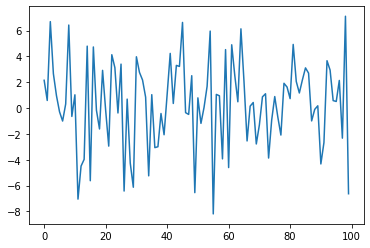

In [43]:
sample_size = 100
random_sample = np.array(np.random.normal(loc=0, scale=3, size=sample_size))
#random_sample = np.array([ 4.60555747, -0.94268943, -1.28941562,  0.40409242,  2.07676006,  2.44004877,
 #-1.53734228, -2.30102803,  4.49242054,  2.47501499] )
plt.plot(random_sample)

In [44]:
peaks = peak_detect_improved(random_sample, f := 0.5, sample_size // sample_size)

In [45]:
#peak_heights = [random_sample[i]  for i in peak_detect(random_sample, 0.2)]
peak_heights = [random_sample[i]  for i in peaks]
len(peak_heights)

27

In [46]:
x = np.array( range(len(random_sample)) )
len(x)

100

In [47]:
print(
    len(peaks),
    len(peak_heights),
    len(x),
    len(random_sample),
)

27 27 100 100


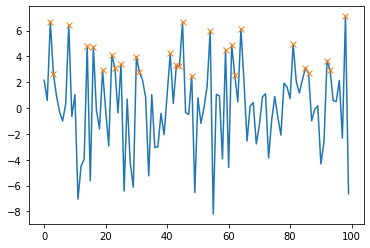

In [48]:
plt.plot(x, random_sample,'-', x[peaks], peak_heights,'x')